Ejercicio prueba:

Queremos hacer un modelo que nos permita conocer que tipo de consumo tendrá el avion de unas determinadas compañias aereas. 

Suponiendo un problema de regresión a partir del siguiente dataset ``dataset_viajes.csv`` y
con nuestra ``target="consumo_kg"``.

Para ello, vamos a cubrir la primera parte del ejercicio que es sacar información del dataset. El modelado lo dejaremos para otro momento

In [1]:
#Ejemplo Aviones

In [2]:
# Importo librerias
import pandas as pd
import ML_ToolBox as tbox
import numpy as np
import seaborn as sns

In [3]:
# Cargo dataset y analizo sus columnas
df = pd.read_csv("./data/dataset_viajes.csv")
df.head(20)

,Id_vuelo,Aircompany,Origen,Destino,Distancia,avion,consumo_kg,duracion
0,Air_PaGi_10737,Airnar,París,Ginebra,411.0,Boeing 737,NaN,51.0
1,Fly_BaRo_10737,FlyQ,Bali,Roma,12738.0,Boeing 737,33479.13254400001,1167.0
2,Tab_GiLo_11380,TabarAir,Ginebra,Los Angeles,9103.0,Airbus A380,NaN,626.0
3,Mol_PaCi_10737,MoldaviAir,París,Cincinnati,6370.0,Boeing 737,17027.01,503.0
4,Tab_CiRo_10747,TabarAir,Cincinnati,Roma,7480.0,Boeing 747,86115.744,518.0
5,Mol_CaMe_10737,MoldaviAir,Cádiz,Melbourne,20029.0,Boeing 737,53148.15324000001,NaN
6,Mol_PaLo_11320,MoldaviAir,París,Londres,344.0,Airbus A320,915.2464,44.0
7,Pam_PaMe_11380,PamPangea,París,Melbourne,16925.0,Airbus A380,217722.6584,1328.0
8,Pam_NuBa_10737,PamPangea,Nueva York,Bali,16589.0,Boeing 737,45277.61846400001,1459.0
9,Air_GiCa_11380,Airnar,Ginebra,Cádiz,NaN,Airbus A380,NaN,135.0


Variables

* Id_vuelo: Identificador del vuelo. Se forma a partir de las iniciales de la compañia, iniciales Origen, iniciales destino, y numero del modelo de avion.
* Aircompany: Nombre de la compañia.
* Origen: Ciudad de Origen.
* Destino: Ciudad de Destino.
* Distancia: Distancia entre ciudades en km.
* avion: Modelo de avion.
* consumo_kg: Consumo de combustible durante el vuelo en kg.
* duracion: Tiempo que dura el trayecto, en min,

In [4]:
# Utilizamos la función describe_df:
tbox.describe_df(df)

,Id_vuelo,Aircompany,Origen,Destino,Distancia,avion,consumo_kg,duracion
Data_Type,object,object,object,object,float64,object,object,float64
Missings(%),0.0,0.0,0.0,0.0,12.8,0.0,13.8,14.7
Unique_Values,418,5,11,55,45,4,703,116
Card(%),41.8,0.5,1.1,5.5,4.5,0.4,70.3,11.6


Nos fijamos en varias cosas:
1. Columnas mal clasificadas: consumo_kg
2. Mucha diferencia entre Origen y Destino, hay que investigar esto.
3. Presencia de nulos en distancia, consumo_kg y duración.

#### Primera parte

In [5]:
# 1 Analizamos consumo_kg:
df["consumo_kg"].head(10)

0                  NaN
1    33479.13254400001
2                  NaN
3             17027.01
4            86115.744
5    53148.15324000001
6             915.2464
7          217722.6584
8    45277.61846400001
9                  NaN
Name: consumo_kg, dtype: object

In [6]:
# Reemplazar comas por puntos en la columna
df["consumo_kg"] = df["consumo_kg"].str.replace(',', '.', regex=True)

In [7]:
# Convertir a numerico
df["consumo_kg"]=pd.to_numeric(df['consumo_kg'], errors='coerce')

In [8]:
# Verificamos cambios:
tbox.describe_df(df)

,Id_vuelo,Aircompany,Origen,Destino,Distancia,avion,consumo_kg,duracion
Data_Type,object,object,object,object,float64,object,float64,float64
Missings(%),0.0,0.0,0.0,0.0,12.8,0.0,13.8,14.7
Unique_Values,418,5,11,55,45,4,658,116
Card(%),41.8,0.5,1.1,5.5,4.5,0.4,65.8,11.6


#### Segunda parte

In [9]:
# 2 Diferencia entre Origen y Destino:
df["Origen"].value_counts()

Origen
Bali           134
Ginebra        134
Cincinnati     119
Londres        112
Nueva York     106
París           94
Melbourne       86
Los Angeles     71
Cádiz           55
Roma            55
Barcelona       34
Name: count, dtype: int64

In [10]:
df["Destino"].value_counts()

Destino
Cincinnati     125
Bali           122
Londres        111
París          111
Ginebra        102
Nueva York     102
Roma            83
Los Angeles     62
Cádiz           58
Melbourne       52
Barcelona       21
BaRCelONa        2
GiNeBra          2
GINEbRa          2
GINebra          2
GInebra          2
GinEbra          2
GInEBrA          2
GineBra          1
MeLbOurne        1
MelBouRne        1
MelBourne        1
GINEBrA          1
MelBoUrne        1
GiNEbra          1
MELBoURne        1
MELBourNe        1
GINeBrA          1
BARCEloNA        1
MElbOUrnE        1
GiNEBra          1
BarcELONa        1
MElbouRnE        1
GInEBra          1
GInEBRa          1
GinebrA          1
MelboURNe        1
MelbOUrnE        1
BARcelOnA        1
MelBOUrnE        1
GInebRA          1
GINEbRA          1
GIneBra          1
GINebRa          1
MeLbourne        1
GIneBrA          1
MElboUrNe        1
GiNEbRa          1
MeLboURnE        1
GiNebrA          1
GInEbRa          1
GINEBra          1
MELb

In [11]:
# Corregir los valores de la columna "Destino"
df["Destino"] = df["Destino"].str.title()

In [12]:
df["Destino"].value_counts()

Destino
Ginebra        131
Cincinnati     125
Bali           122
Londres        111
París          111
Nueva York     102
Roma            83
Melbourne       69
Los Angeles     62
Cádiz           58
Barcelona       26
Name: count, dtype: int64

In [25]:
# Verificamos cambios:
tbox.describe_df(df)

,Id_vuelo,Aircompany,Origen,Destino,Distancia,avion,consumo_kg,duracion
Data_Type,object,object,object,object,float64,object,float64,float64
Missings(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unique_Values,418,5,11,11,45,4,726,173
Card(%),41.8,0.5,1.1,1.1,4.5,0.4,72.6,17.3


#### Tercera parte

In [14]:
# Añadir nulos en Destino:
dist = {}

for city1 in df["Origen"].unique():
    for city2 in df["Destino"].unique():
        if city1 == city2:
            continue
        else:
            # Filtrar el DataFrame para la combinación actual de 'Origen' y 'Destino'
            subset_df = df[(df["Origen"] == city1) & (df["Destino"] == city2)]
            
            # Calcular la media de la distancia para esa combinación
            dist_mean = subset_df["Distancia"].mean()
            
            # Crear una clave única para el diccionario
            key = f"{city1}:{city2}"
            
            # Agregar la combinación y la distancia media al diccionario
            dist[key] = dist_mean
            
            # Reemplazar NaN en el DataFrame con la distancia media correspondiente
            mask = (df["Origen"] == city1) & (df["Destino"] == city2) & df["Distancia"].isna()
            df.loc[mask, "Distancia"] = dist.get(key, np.nan)

In [15]:
# Añadir nulos en consumo_kg:
consumo = {}

for city1 in df["Origen"].unique():
    for city2 in df["Destino"].unique():
        if city1 == city2:
            continue
        else:
            # Filtrar el DataFrame para la combinación actual de 'Origen' y 'Destino'
            subset_df = df[(df["Origen"] == city1) & (df["Destino"] == city2)]
            
            # Calcular la media de la consumo para esa combinación
            consumo_mean = subset_df["consumo_kg"].mean()
            
            # Crear una clave única para el diccionario
            key = f"{city1}:{city2}"
            
            # Agregar la combinación y el consumo medio al diccionario
            consumo[key] = consumo_mean
            
            # Reemplazar NaN en el DataFrame con el consumo medio correspondiente
            mask = (df["Origen"] == city1) & (df["Destino"] == city2) & df["consumo_kg"].isna()
            df.loc[mask, "consumo_kg"] = consumo.get(key, np.nan)

In [16]:
# Añadir nulos en duracion
duracion = {}

for city1 in df["Origen"].unique():
    for city2 in df["Destino"].unique():
        if city1 == city2:
            continue
        else:
            # Filtrar el DataFrame para la combinación actual de 'Origen' y 'Destino'
            subset_df = df[(df["Origen"] == city1) & (df["Destino"] == city2)]
            
            # Calcular la media de la duracion para esa combinación
            duracion_mean = subset_df["duracion"].mean()
            
            # Crear una clave única para el diccionario
            key = f"{city1}:{city2}"
            
            # Agregar la combinación y la duracion media al diccionario
            duracion[key] = duracion_mean
            
            # Reemplazar NaN en el DataFrame con la duracion media correspondiente
            mask = (df["Origen"] == city1) & (df["Destino"] == city2) & df["duracion"].isna()
            df.loc[mask, "duracion"] = duracion.get(key, np.nan)

In [17]:
# Verificamos cambios:
tbox.describe_df(df)

,Id_vuelo,Aircompany,Origen,Destino,Distancia,avion,consumo_kg,duracion
Data_Type,object,object,object,object,float64,object,float64,float64
Missings(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unique_Values,418,5,11,11,45,4,726,173
Card(%),41.8,0.5,1.1,1.1,4.5,0.4,72.6,17.3


Hemos asignadodo todos los nulos correctamente imputando sus medias en los faltantes.

Vamos a ver como podemos describir esas variables numéricas.

In [27]:
# Utilizamos la funcion tipifica_variables:
tbox.tipifica_variables(df,10,30.0)

TypeError: tipifica_variables() takes 3 positional arguments but 4 were given

#### Obtencion de las features

In [28]:
# Utilizamos funcion get_features_num_regression
feat_num=tbox.get_features_num_reggresion(df,"Aircompany",0.2)
feat_num

Error: La columna 'Aircompany' no es una variable numérica continua.


Correlación entre Distancia y consumo_kg: 0.7714, p-value: 0.0000
Correlación entre duracion y consumo_kg: 0.6981, p-value: 0.0000


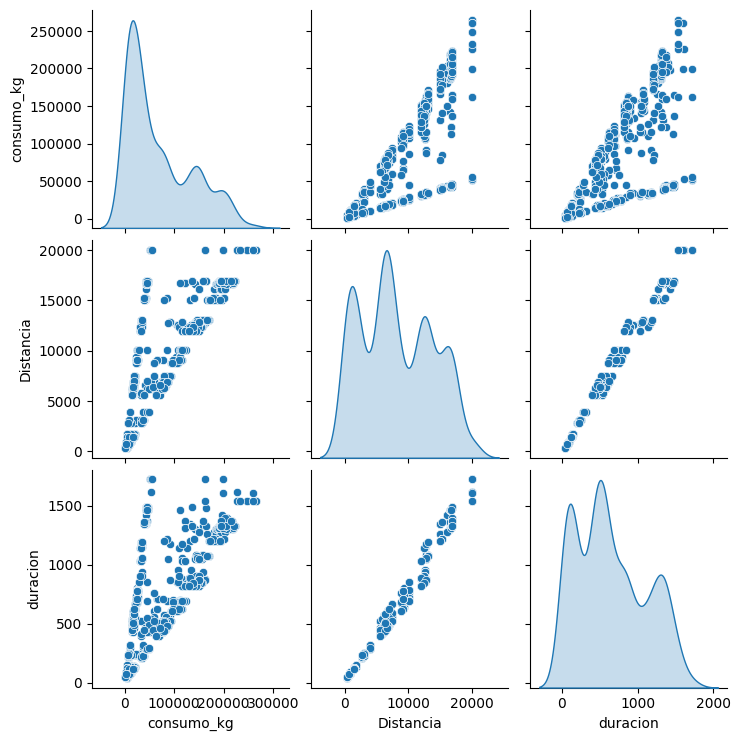

In [20]:
# Utilizamos funcion plot_features_num_regression
tbox.plot_features_num_regression(df,"consumo_kg",feat_num)

In [21]:
# Utilizamos funcion get_features_cat_regression
feat_cat=tbox.get_features_cat_regression(df,"consumo_kg")
feat_cat

['Id_vuelo', 'Aircompany', 'Origen', 'Destino', 'avion']

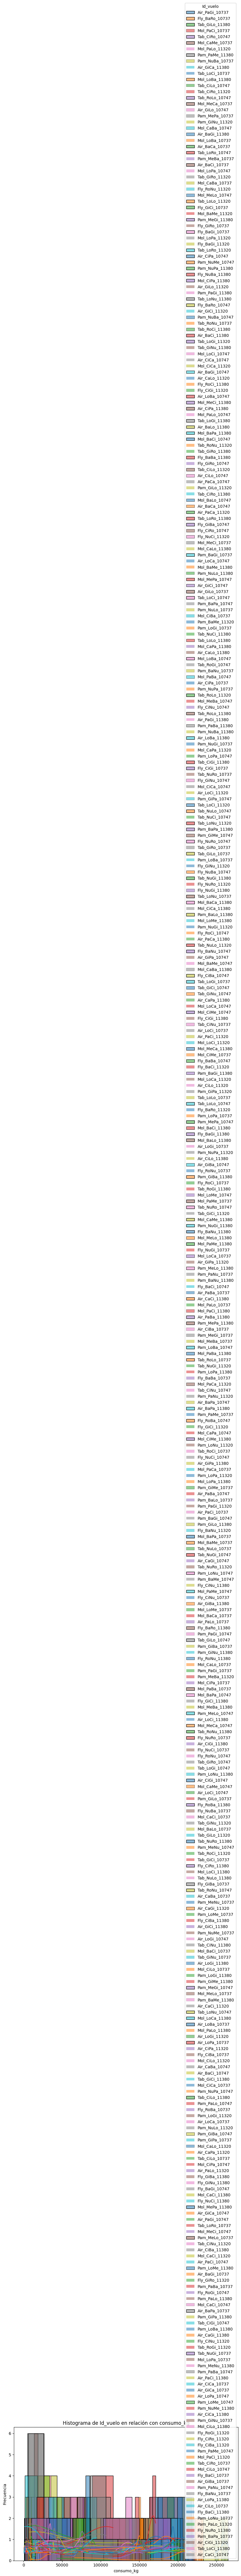

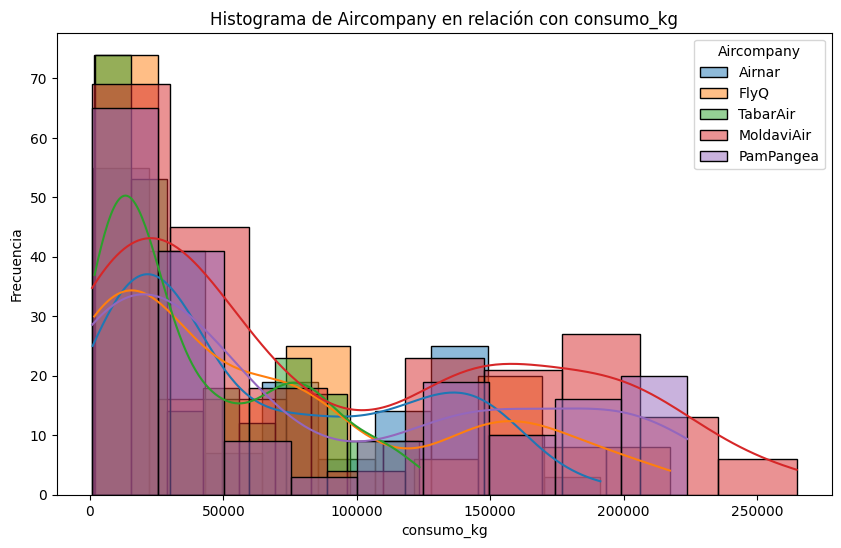

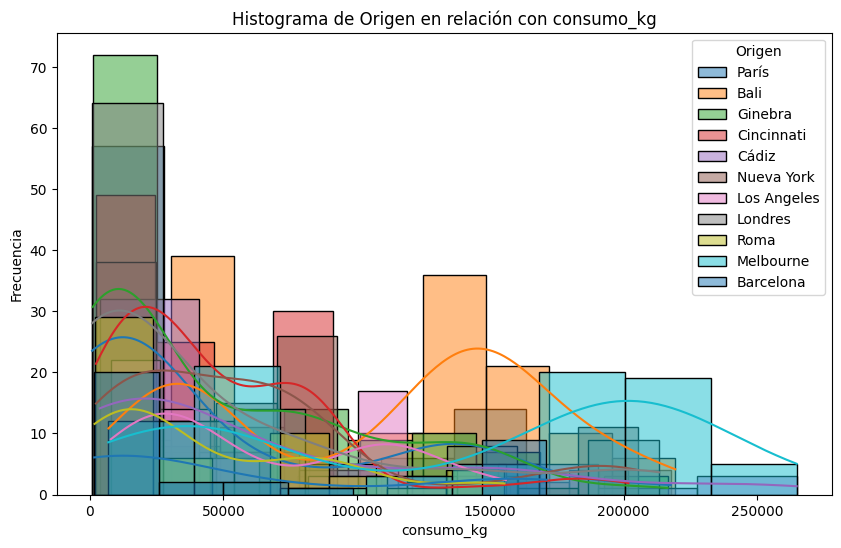

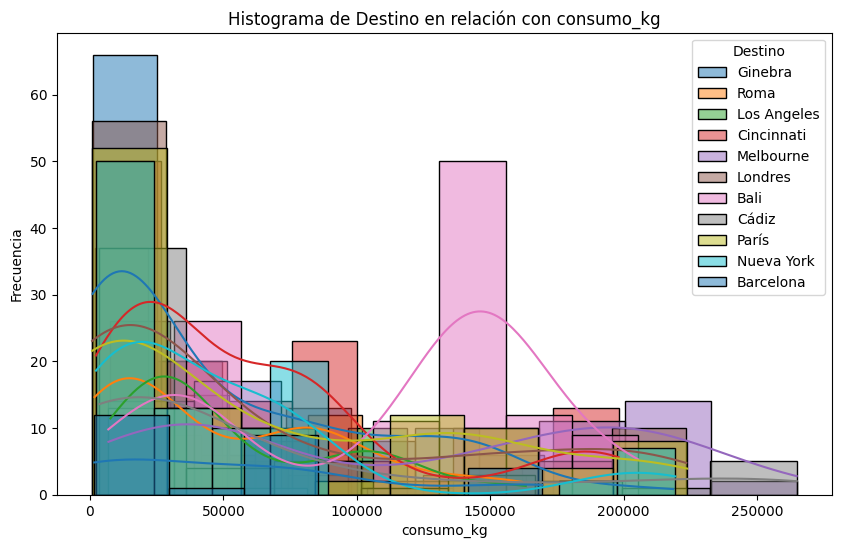

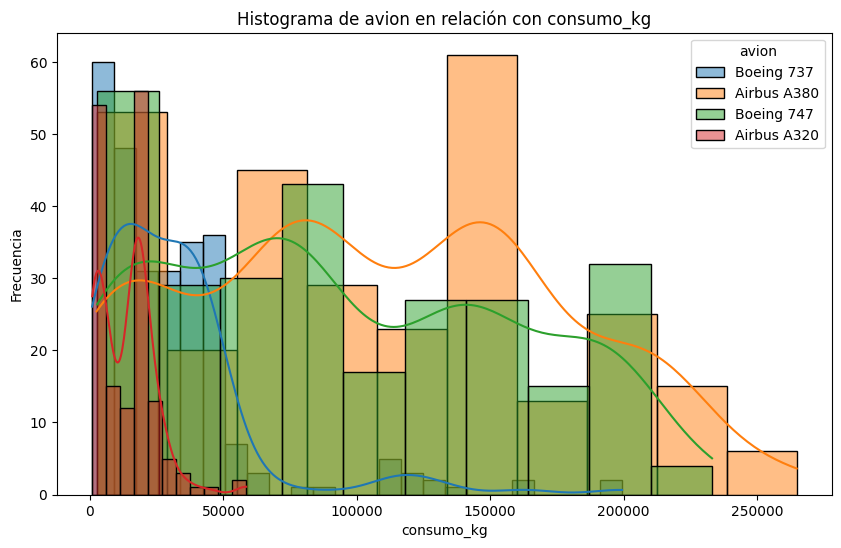

In [22]:
# Utilizamos funcion plot_features_cat_regression
tbox.plot_features_cat_regression(df,"consumo_kg", feat_cat, umbral_card=0.001)